# Lab | Cleaning numerical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder.

### Context

An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

### Some business Objectives:

Retain customers,
Analyze relevant customer data,
Develop focused customer retention programs.
Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

### Instructions

1. Import the necessary libraries.
2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df
3. First look at its main features (head, shape, info).
4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)
5. Change effective to date column to datetime format.
6. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df
7. Plot a correlation matrix, comment what you see.
8. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)
9. Comment what you can see in the plots.
10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)
11. Did you find outliers? Comment what you will do with them.
12. Check all columns for NaN values. Decide what (if anything) you will need to do with them.

#### Step 1: Import Python Libraries

In [483]:
# prep: import modules and get pwd
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2, f_regression

%matplotlib inline

pd.set_option('display.max_columns', None)


#### Step 2: Read the Dataset¶

In [484]:
# get the data
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


#### Step 3: Explore the Dataset

In [485]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [486]:
customer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [487]:
# Convert column names to lowercase
customer_df.columns= customer_df.columns.str.lower()

# replace spaces by '_'
customer_df.columns= customer_df.columns.str.replace(' ', '_')

customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [488]:
# Change efective date to datetime format
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df['effective_to_date'].dtype

dtype('<M8[ns]')

In [489]:
customer_df.nunique()

customer                         9134
state                               5
customer_lifetime_value          8041
response                            2
coverage                            3
education                           5
effective_to_date                  59
employmentstatus                    5
gender                              2
income                           5694
location_code                       3
marital_status                      3
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
policy_type                         3
policy                              9
renew_offer_type                    4
sales_channel                       4
total_claim_amount               5106
vehicle_class                       6
vehicle_size                        3
dtype: int64

In [490]:
customer_df.nunique()/len(customer_df)*100

customer                         100.000000
state                              0.054741
customer_lifetime_value           88.033720
response                           0.021896
coverage                           0.032844
education                          0.054741
effective_to_date                  0.645938
employmentstatus                   0.054741
gender                             0.021896
income                            62.338515
location_code                      0.032844
marital_status                     0.032844
monthly_premium_auto               2.211517
months_since_last_claim            0.394132
months_since_policy_inception      1.094811
number_of_open_complaints          0.065689
number_of_policies                 0.098533
policy_type                        0.032844
policy                             0.098533
renew_offer_type                   0.043792
sales_channel                      0.043792
total_claim_amount                55.901029
vehicle_class                   

In [491]:
def con_disc_data(DataFrame):
    continuous = []
    discrete = []

    for col in customer_df.columns:
        if (customer_df[col].nunique()/len(customer_df)*100) > 1:
            continuous.append(col)
        else:
            discrete.append(col)
    
    return discrete, continuous



In [492]:
discrete, continuous = con_disc_data(customer_df)


In [493]:
discrete_df = customer_df[discrete].select_dtypes(include = np.number)
print(discrete_df.shape)
continuous_df = customer_df[continuous].select_dtypes(include = np.number)
print(continuous_df.shape)

(9134, 3)
(9134, 5)


In [494]:
discrete_df.head()

,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1


In [495]:
continuous_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879


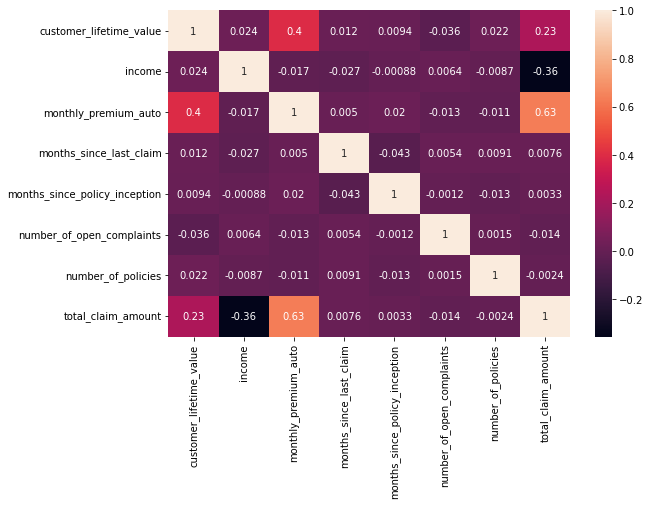

In [496]:
corr_matrix = customer_df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(9, 6))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [497]:
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In the heapmap above we see that:
 - Customer lifetime value has a relative high correlation with monthly premium auto. The greater the Customer lifetime value the greater is monthly premium auto.

 - Customer lifetime value has an acceptable correlation with total claim amount. 
 
 - Total claim amount is highly correlated with monthly premium auto. 
 
 - Income is negatively correlated with total claim amount, meaning that when the income increases, the total claim amount decreaes
 
 - There is no strong relationship between other features

In [498]:
# Computing the VIF to detect multicollinearity among independent variables 

# compute the vif for all given features
def compute_vif(features):
    
    X = customer_df[features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif['Variable'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

# features to consider removing
features = ['income','monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies','total_claim_amount']


# compute vif 
compute_vif(features).sort_values('VIF', ascending=False)

/var/folders/f0/2kttb75n7ksfn0xybq11r6h40000gn/T/ipykernel_1549/2191710091.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
6,total_claim_amount,2.076623
1,monthly_premium_auto,1.815995
0,income,1.248167
2,months_since_last_claim,1.002756
3,months_since_policy_inception,1.002638
5,number_of_policies,1.000454
4,number_of_open_complaints,1.000274


There is no correlation among the variables, since the VIF for all features is low (<5).

In [499]:
def plot_discrete(x):
    
    for col in x.columns:
        x.hist(figsize=(15, 10))
        plt.show()

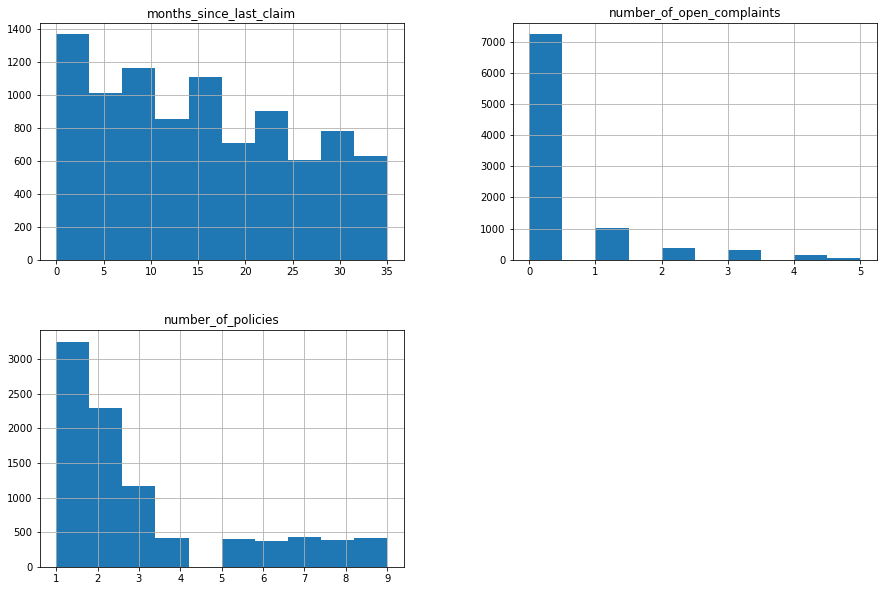

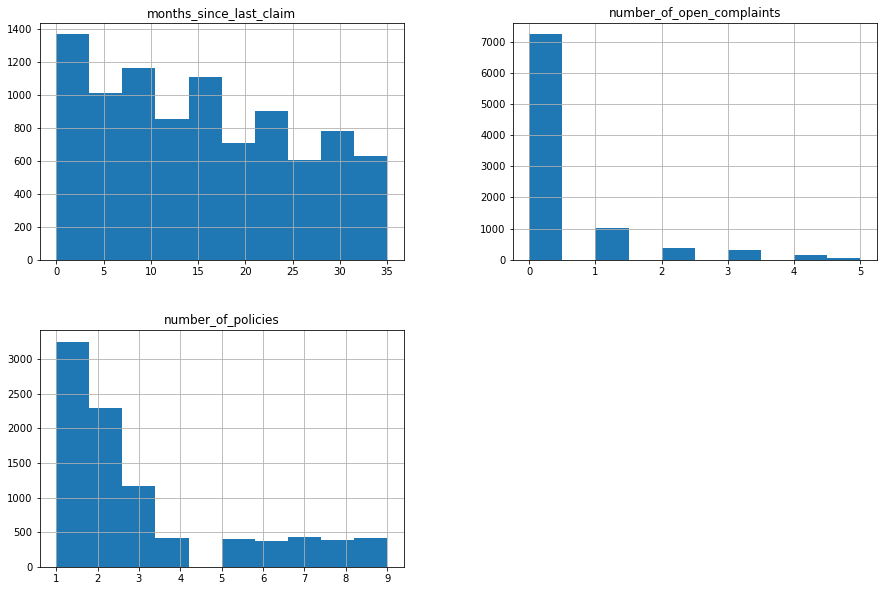

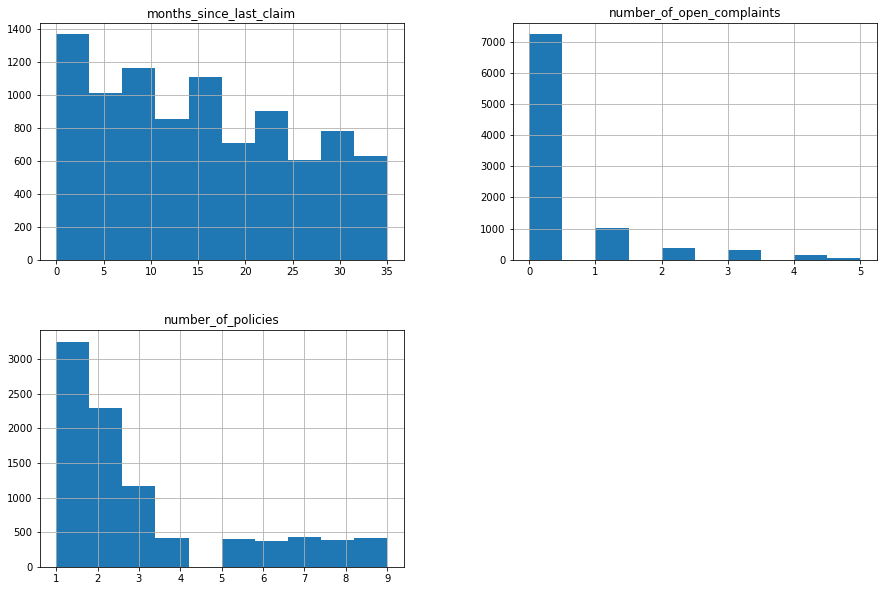

In [500]:
plot_discrete(discrete_df)

#### Find outliers with boxplot and IQR:

In [501]:
def plot_continuous(data):
    
    for col in data.columns:
        sns.boxplot(data[col], data = data)
        plt.show()
        

All data points out of the lower and upper whiskers are outliers.

Looking at the box plots below, it is visible that monthly_premium_auto and total_claim_amount have outliers

/Users/mariaesquivel/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


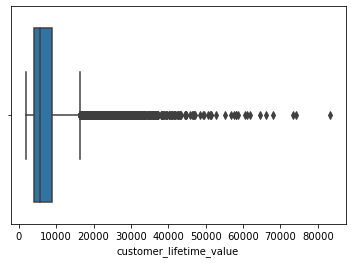

/Users/mariaesquivel/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


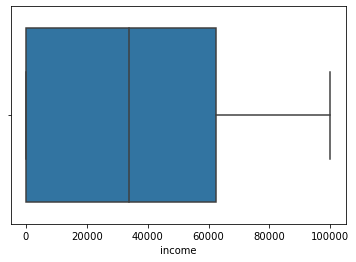

/Users/mariaesquivel/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


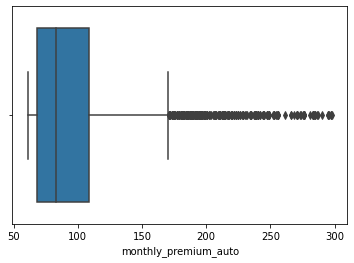

/Users/mariaesquivel/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


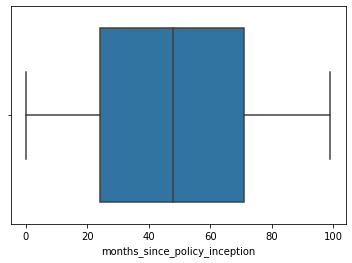

/Users/mariaesquivel/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


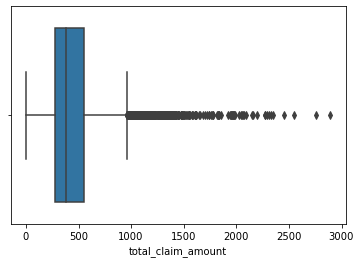

In [502]:
plot_continuous(continuous_df)

In [503]:
# Calculate the 1st quartile
q1 = np.quantile(continuous_df['customer_lifetime_value'], 0.25)
 
# Calculate the 3rd quartile
q3 = np.quantile(continuous_df['customer_lifetime_value'], 0.75)
median = np.median(continuous_df['customer_lifetime_value'])
    
IQR = q3-q1
upper_bound = q3+(1.5*IQR)
lower_bound = q1-(1.5*IQR)
outliers = list(continuous_df['customer_lifetime_value'][(continuous_df['customer_lifetime_value'] <= lower_bound) | (continuous_df['customer_lifetime_value'] >= upper_bound)])

print('customer_lifetime_value: ')
print('IQR: ', IQR)
print('upper_bound: ', upper_bound)
print('lower_bound: ', lower_bound)

print(' ')

print('The following are the outliers in the boxplot:{}'.format(outliers))
    

customer_lifetime_value: 
IQR:  4967.915247000001
upper_bound:  16414.039911750002
lower_bound:  -3457.6210762500014
 
The following are the outliers in the boxplot:[24127.50402, 24127.50402, 18975.45611, 36707.42639, 33473.34946, 24261.01777, 22643.83478, 58166.55351, 20946.19251, 24084.5352, 31221.7481, 19776.56654, 21343.46599, 16936.27147, 23706.11337, 32269.85139, 25755.27817, 16706.11699, 17840.19555, 17930.60451, 29328.04185, 22855.61209, 16727.56063, 18042.47942, 31161.74523, 25585.72783, 32654.8383, 22103.5072, 18211.14319, 23444.90045, 33473.34946, 44795.46942, 28685.82785, 18929.3306, 24143.87556, 29091.23936, 19834.20115, 35537.846, 34611.37896, 20216.30883, 27776.28906, 21903.91364, 18073.93999, 23594.6802, 19582.46887, 36057.53702, 20714.94043, 17497.52201, 35850.59935, 23875.47675, 30475.78048, 21435.87782, 26843.12452, 29194.36639, 27789.69235, 21423.63723, 25830.90982, 24127.50402, 17857.97233, 17771.54902, 18269.27017, 27580.55396, 21147.27716, 22500.88348, 24980.2255

In [504]:
# Calculate the 1st quartile
q1 = np.quantile(continuous_df['monthly_premium_auto'], 0.25)
 
# Calculate the 3rd quartile
q3 = np.quantile(continuous_df['monthly_premium_auto'], 0.75)
median = np.median(continuous_df['monthly_premium_auto'])
    
IQR = q3-q1
upper_bound = q3+(1.5*IQR)
lower_bound = q1-(1.5*IQR)
outliers = list(continuous_df['monthly_premium_auto'][(continuous_df['monthly_premium_auto'] <= lower_bound) | (continuous_df['monthly_premium_auto'] >= upper_bound)])


print('monthly_premium_auto: ')
print('IQR: ', IQR)
print('upper_bound: ', upper_bound)
print('lower_bound: ', lower_bound)

print(' ')

print('The following are the outliers in the boxplot:{}'.format(outliers))
    

monthly_premium_auto: 
IQR:  41.0
upper_bound:  170.5
lower_bound:  6.5
 
The following are the outliers in the boxplot:[237, 172, 186, 192, 217, 255, 190, 245, 225, 171, 244, 183, 176, 183, 230, 177, 196, 276, 253, 180, 203, 192, 198, 193, 271, 188, 271, 206, 196, 193, 182, 189, 295, 210, 182, 239, 188, 256, 188, 173, 196, 192, 285, 197, 199, 214, 171, 198, 271, 214, 175, 199, 194, 181, 180, 239, 222, 215, 283, 248, 223, 239, 273, 213, 185, 188, 287, 180, 196, 192, 297, 244, 201, 192, 189, 196, 235, 196, 183, 268, 171, 182, 211, 192, 187, 235, 276, 185, 198, 242, 193, 186, 210, 210, 175, 199, 180, 197, 223, 215, 276, 276, 180, 186, 172, 215, 212, 199, 249, 181, 187, 240, 196, 189, 181, 181, 225, 199, 192, 201, 245, 193, 295, 191, 187, 199, 186, 181, 239, 199, 195, 180, 216, 173, 182, 199, 196, 194, 185, 249, 185, 191, 199, 181, 193, 211, 214, 187, 179, 232, 244, 193, 181, 181, 182, 214, 183, 185, 185, 187, 198, 211, 190, 186, 181, 212, 181, 207, 197, 283, 240, 196, 196, 240, 173, 190,

In [505]:
# Calculate the 1st quartile
q1 = np.quantile(continuous_df['total_claim_amount'], 0.25)
 
# Calculate the 3rd quartile
q3 = np.quantile(continuous_df['total_claim_amount'], 0.75)
median = np.median(continuous_df['total_claim_amount'])
    
IQR = q3-q1
upper_bound = q3+(1.5*IQR)
lower_bound = q1-(1.5*IQR)
outliers = list(continuous_df['total_claim_amount'][(continuous_df['total_claim_amount'] <= lower_bound) | (continuous_df['total_claim_amount'] >= upper_bound)])


print('total_claim_amount: ')
print('IQR: ', IQR)
print('upper_bound: ', upper_bound)
print('lower_bound: ', lower_bound)

print(' ')

print('The following are the outliers in the boxplot:{}'.format(outliers))
    

total_claim_amount: 
IQR:  275.25659425
upper_bound:  960.3997301249999
lower_bound:  -140.62664687499995
 
The following are the outliers in the boxplot:[1131.464935, 982.399613, 975.107098, 1087.995426, 1122.658899, 1836.0, 1124.427734, 1284.093173, 2345.413441, 1101.6, 1159.2, 1252.406235, 1003.160633, 1317.6, 1090.86434, 1337.063487, 980.169081, 1324.8, 1171.93117, 1214.4, 1002.782553, 1210.920949, 2027.724442, 1382.4, 1577.674417, 1193.036154, 1300.8, 1265.570302, 1022.4, 1300.8, 1254.137899, 972.0, 1310.4, 1360.8, 1416.0, 1008.0, 2893.239678, 1185.988301, 1228.8, 1353.6, 1027.000029, 1027.177255, 1336.931716, 1067.333126, 1418.4, 1027.2, 1300.8, 1149.203884, 1027.2, 1261.943541, 964.8, 1294.700423, 1253.984948, 1027.000029, 1032.0, 973.787176, 1358.4, 1207.084251, 1605.6, 989.105367, 1294.700423, 972.0, 1965.6, 1448.994134, 1186.972445, 979.2, 1178.995926, 1353.6, 1377.6, 1777.471271, 1382.4, 1767.348807, 1171.2, 964.8, 1227.458548, 1072.8, 1051.2, 2201.327879, 1012.249308, 1052.

# STILL TO BE DONE: DEAL WITH OUTLIERS

#### Checking for NaN

In [506]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

There are no null values, so no further action required to replace missing or null values.

# Lab | Cleaning categorical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder. In this lab we will explore categorical data.

### Instructions

1. Import the necessary libraries if you are starting a new notebook. Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv
2. Find all of the categorical data. Save it in a categorical_df variable.
3. Check for NaN values.
4. Check all unique values of columns.
5. Check dtypes. Do they all make sense as categorical data?
6. Does any column contain alpha and numeric data? Decide how to clean it.
7. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.
8. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?
9. Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

#### Categorical data set

In [507]:

categorical_df = customer_df.select_dtypes(include = object)
categorical_df

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


#### Checking for NaN

In [508]:
categorical_df.isna().sum()

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

There are no null values, so no further action required to replace missing or null values.

In [509]:
categorical_df.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

#### Checking for unique values¶

In [510]:
for col in categorical_df:
    print(col)
    print(categorical_df[col].unique())
    print('\n')

customer
['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']


state
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']


response
['No' 'Yes']


coverage
['Basic' 'Extended' 'Premium']


education
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']


employmentstatus
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']


gender
['F' 'M']


location_code
['Suburban' 'Rural' 'Urban']


marital_status
['Married' 'Single' 'Divorced']


policy_type
['Corporate Auto' 'Personal Auto' 'Special Auto']


policy
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']


renew_offer_type
['Offer1' 'Offer3' 'Offer2' 'Offer4']


sales_channel
['Agent' 'Call Center' 'Web' 'Branch']


vehicle_class
['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']


vehicle_size
['Medsize' 'Small' 'Large']




In [511]:
categorical_df['customer'].value_counts()

BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64

- Column 'customer' has too many unique values therefore can be removed from the dataset. Not relevant for the model

In [512]:
categorical_df['state'].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

- Top 3 states - California, Oregon and Arizona - include almost 82% of total number os customers

In [513]:
categorical_df['response'].value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

In [514]:
categorical_df['coverage'].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

In [515]:
categorical_df['education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

- All these categories could be grouped in two groups: Undergraduate and Graduate

In [516]:
categorical_df['employmentstatus'].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

- Unemployed, Medical Leave, Disabled and Retired are non-active statuses, so, this van be converted into two categories: Active vs Non-active

In [517]:
categorical_df['gender'].value_counts()

F    4658
M    4476
Name: gender, dtype: int64

In [518]:
categorical_df['location_code'].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

In [519]:
categorical_df['marital_status'].value_counts()

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

In [520]:
categorical_df['policy_type'].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [521]:
categorical_df['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

- Type (personal, corporate or special) in the column 'policy' is redundant. Already included in the column 'policy_type'
- Regardless the type, policies are all L1, L2 or L3, so we can drop the L and make this column numeric / discrete 

In [522]:
categorical_df['renew_offer_type'].value_counts()

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

In [523]:
categorical_df['sales_channel'].value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

In [524]:
categorical_df['vehicle_class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

In [525]:
categorical_df['vehicle_size'].value_counts()

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

# STILL NEED TO CLEAN CATEGORICAL DATA

# Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

### Instructions

1. Open the categoricals variable we created before.
    - categoricals = data.select_dtypes(np.object)
    - categoricals.head()
2. Plot all the categorical variables with the proper plot. What can you see?
3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
4. Plot time variable. Can you extract something from it?

In [526]:
categorical_df.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


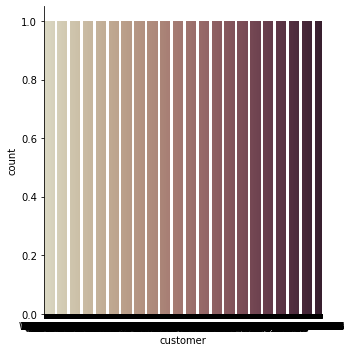

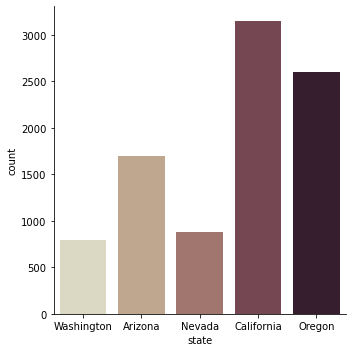

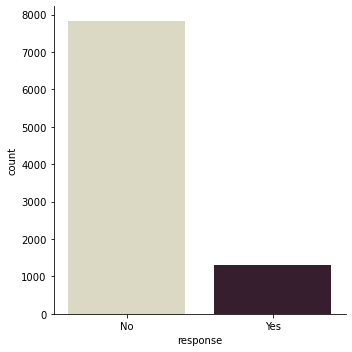

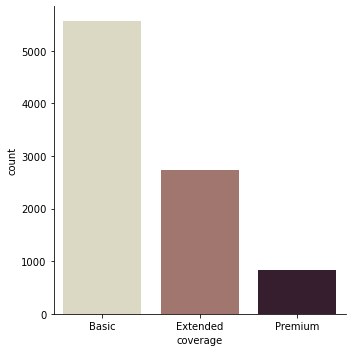

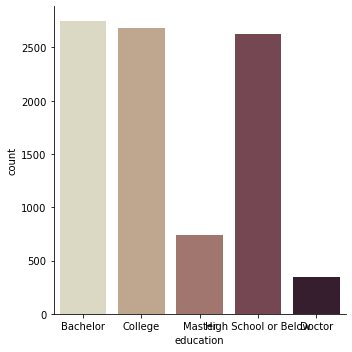

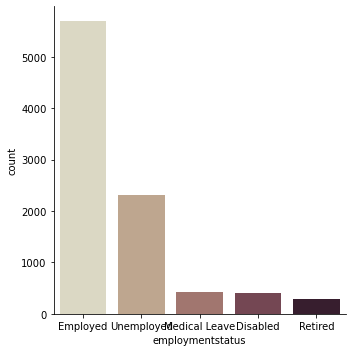

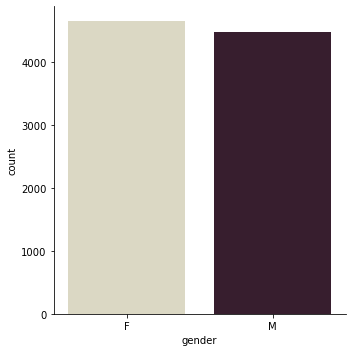

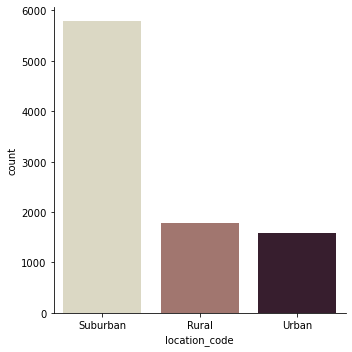

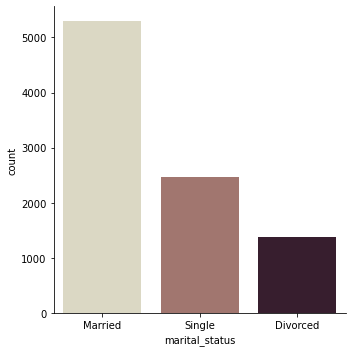

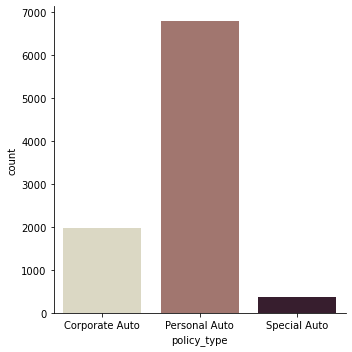

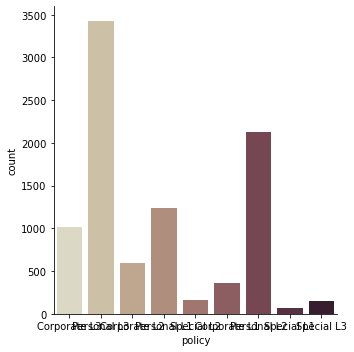

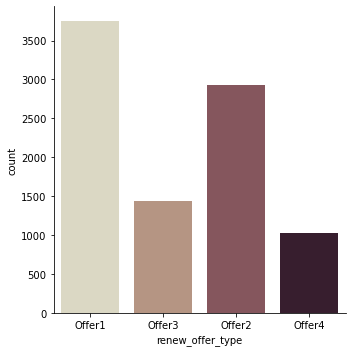

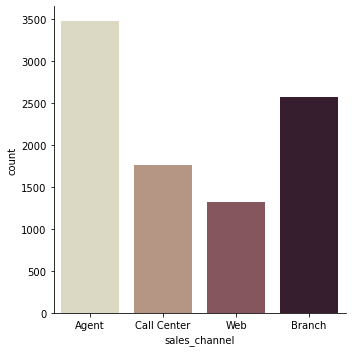

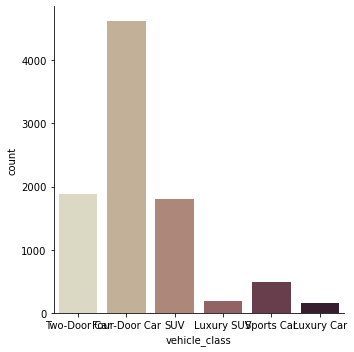

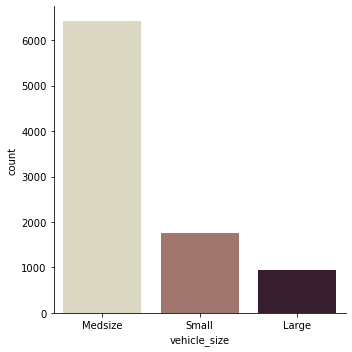

In [527]:
for col in categorical_df.columns:
    sns.catplot(data=categorical_df, x=col, kind="count", palette="ch:.40")
    plt.show()

In [528]:
# Check whether a variable is redundant


In [529]:
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [530]:
categoricals = customer_df.select_dtypes(object)
categoricals = categoricals.drop(['customer'], axis=1)
print('Categorical columns: ',categoricals.columns)
numericals = customer_df.select_dtypes(np.number)
print('Numerical columns: ',numericals.columns)

Categorical columns:  Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')
Numerical columns:  Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')


In [531]:
# categorical feature selection


categoricals = pd.get_dummies(categoricals, drop_first=True)

X = categoricals # input categorical features

y = customer_df['customer_lifetime_value'] # target variable


# categorical feature selection
sf = SelectKBest(score_func=f_regression, k='all')
sf_fit = sf.fit(X, y)

    
    
    

In [532]:
# Select top 10 based on score
datset = pd.DataFrame()
datset['feature'] = X.columns[ range(len(sf_fit.scores_))]
datset['scores'] = sf_fit.scores_
datset = datset.sort_values(by='scores', ascending=False)
datset.head(24)

,feature,scores
37,vehicle_class_Luxury SUV,343.079002
36,vehicle_class_Luxury Car,297.149751
38,vehicle_class_SUV,290.521612
6,coverage_Premium,163.150791
40,vehicle_class_Two-Door Car,90.455443
39,vehicle_class_Sports Car,82.361217
5,coverage_Extended,51.391815
30,renew_offer_type_Offer2,33.851737
32,renew_offer_type_Offer4,16.655162
11,employmentstatus_Employed,14.739887


Looking at the scores above, the best categorical features to select for predicting the customer lifetime value are as follows:
1. vehicle_class
2. coverage
3. renew_offer_type
4. employmentstatus
5. policy


In [533]:
datetime_df = customer_df[['effective_to_date','customer']]
datetime_df = datetime_df.groupby(['effective_to_date']).agg({'customer':pd.Series.nunique}).rename(columns={'customer':'number'})
datetime_df.head()



,number
effective_to_date,
2011-01-01,148
2011-01-02,160
2011-01-03,178
2011-01-04,115
2011-01-05,167


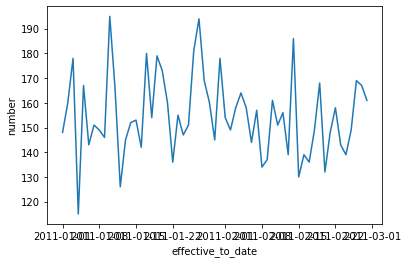

In [534]:

sns.lineplot(x = 'effective_to_date', y = 'number', data = datetime_df)
plt.show()

# Lab | Comparing regression models

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

Instructions

1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.


2. We will start with removing outliers, if you have not already done so. We have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.


3. Create a copy of the dataframe for the data wrangling.


4. Normalize the continuous variables. You can use any one method you want.


5. Encode the categorical variables (See the hint below for encoding categorical data!!!)


6. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.


7. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

            Hint for Categorical Variables

            You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):

            Encoder Type	Column
                One hot	state
                Ordinal	coverage
                Ordinal	employmentstatus
                Ordinal	location code
                One hot	marital status
                One hot	policy type
                One hot	policy
                One hot	renew offercustomer_df
                One hot	sales channel
                One hot	vehicle class
                Ordinal	vehicle size
                
                
                Dummy code

                    data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

                    given that column "coverage" in the dataframe "data" has three categories:

                    "basic", "extended", and "premium" and values are to be represented in the same order.

8. Try a simple linear regression with all the data to see whether we are getting good results.


9. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.


10. Use the function to check LinearRegressor and KNeighborsRegressor.


11. You can check also the MLPRegressor for this task!


12. Check and discuss the results.

In [535]:
customer_df_lab3 = customer_df.copy()
customer_df_lab3.shape

(9134, 24)

##### Transform time variable data into numerical


In [536]:
# Decided to move this step up as it will be needed for the X/Y split and later for the scaling 

import datetime 

day_of_year = []

for i in customer_df_lab3['effective_to_date']:
    day_of_year.append(i.timetuple().tm_yday)
customer_df_lab3['day_of_year'] = day_of_year

customer_df_lab3 = customer_df_lab3.drop(['effective_to_date'],axis=1)

##### Split variables

In [537]:
X = customer_df_lab3.drop(['total_claim_amount'],axis=1)
y = customer_df_lab3['total_claim_amount']

##### Split into train test

In [538]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [539]:
numericals_train = X_train.select_dtypes(np.number)
numericals_test = X_test.select_dtypes(np.number)
numericals_train.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,day_of_year
3715,9015.915395,0,130,32,38,0,4,23
3824,9672.701942,0,96,5,27,0,2,54
4708,9061.767848,37970,115,8,44,0,3,19
8734,14980.046260,0,222,26,50,0,8,8
6094,8229.240991,0,109,5,63,0,3,14


In [540]:
categoricals_train= X_train.select_dtypes(object)
categoricals_test= X_test.select_dtypes(object)
categoricals_train.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
3715,KN57002,Arizona,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Agent,SUV,Small
3824,FZ19620,Oregon,No,Extended,High School or Below,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
4708,XG74199,Oregon,No,Basic,College,Employed,M,Rural,Married,Personal Auto,Personal L3,Offer1,Agent,SUV,Medsize
8734,TE79454,California,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Luxury Car,Medsize
6094,FX55409,Oregon,No,Basic,Master,Unemployed,F,Urban,Married,Personal Auto,Personal L2,Offer3,Web,SUV,Medsize


##### Remove outliers

<AxesSubplot:>

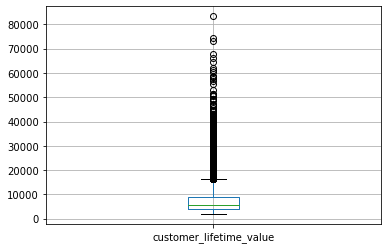

In [541]:
customer_df_lab3.boxplot('customer_lifetime_value')

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>]],
      dtype=object)

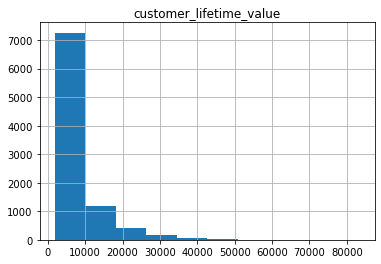

In [542]:
customer_df_lab3.hist('customer_lifetime_value')

<AxesSubplot:>

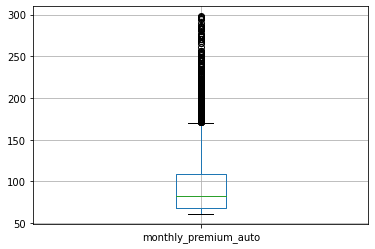

In [543]:
customer_df_lab3.boxplot('monthly_premium_auto')

array([[<AxesSubplot:title={'center':'monthly_premium_auto'}>]],
      dtype=object)

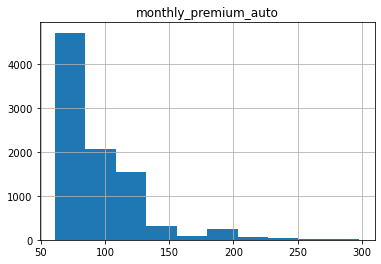

In [544]:
customer_df_lab3.hist('monthly_premium_auto')

- decision not to remove outliers as there is no justifiable reason to remove these points. Looking at the boxplots above, outliers are closely clustered and form a straight line so I assume they are legitimate observations and naturally part of the population.

In [545]:
# LOOP TO REPLACE OULIERS


#for i in ['customer_lifetime_value']:
    #q1 = np.quantile(customer_df_lab3['customer_lifetime_value'], 0.25)
 
    # Calculate the 3rd quartile
    #q3 = np.quantile(customer_df_lab3['customer_lifetime_value'], 0.75)
    #median = np.median(customer_df_lab3['customer_lifetime_value'])
    #IQR = q3-q1
 
    #upper_bound = q3+(1.5*IQR)
    #lower_bound = q1-(1.5*IQR)
 
    #customer_df.loc[customer_df_lab3[i] < lower_bound,i] = np.nan
    #customer_df.loc[customer_df_lab3[i] > upper_bound,i] = np.nan

##### Normalize the continuous variables. You can use any one method you want.

In [546]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(numericals_train)
numericals_train_standardized = transformer.transform(numericals_train)
numericals_test_standardized = transformer.transform(numericals_test)

##### Encode the categorical variables (See the hint below for encoding categorical data!!!

Encoder Type    Column
         One hot    state
         Ordinal    coverage
         Ordinal    employmentstatus
         Ordinal    location code
         One hot    marital status
         One hot    policy type
         One hot    policy
         One hot    renew offercustomer_df
         One hot    sales channel
         One hot    vehicle class
         Ordinal    vehicle size

In [547]:
# split categorical into two tables to apply different encoder types

categoricals_train_ordinal = categoricals_train.drop(['customer','state','marital_status','policy_type',
                                                      'policy','renew_offer_type','sales_channel',
                                                      'vehicle_class'], axis = 1)

categoricals_train_One_hot = categoricals_train.drop(['customer','response','gender','coverage','education','gender','employmentstatus','location_code',
                                                      'vehicle_size'], axis = 1)
                                                         

In [548]:
categoricals_test_ordinal = categoricals_test.drop(['customer','state','marital_status','policy_type',
                                                      'policy','renew_offer_type','sales_channel',
                                                      'vehicle_class'], axis = 1)

categoricals_test_One_hot = categoricals_test.drop(['customer','response','gender','coverage','education','gender','employmentstatus','location_code',
                                                      'vehicle_size'], axis = 1)

In [549]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(categoricals_train_One_hot)
# handle_unknown='error' is used to throw an error if in a new dataset where we apply our model has new columns (categories)

categoricals_train_encoded_onehot = encoder.transform(categoricals_train_One_hot).toarray()
categoricals_test_encoded_onehot = encoder.transform(categoricals_test_One_hot).toarray()

In [550]:
from sklearn.preprocessing import OrdinalEncoder

# set up the encoder
ordinal_enc = OrdinalEncoder().fit(categoricals_train_ordinal)

categoricals_train_encoded_ordinal = ordinal_enc.transform(categoricals_train_ordinal)
categoricals_test_encoded_ordinal = ordinal_enc.transform(categoricals_test_ordinal)


In [551]:
categoricals_train_encoded_ordinal

array([[0., 1., 0., ..., 1., 1., 2.],
       [0., 1., 3., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       ...,
       [0., 0., 2., ..., 1., 1., 2.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 3., ..., 1., 1., 1.]])

In [552]:
# merge encoded
categoricals_train_processed = np.concatenate((categoricals_train_encoded_onehot,categoricals_train_encoded_ordinal),axis=1)
categoricals_test_processed = np.concatenate((categoricals_test_encoded_onehot,categoricals_test_encoded_ordinal),axis=1)

In [553]:
categoricals_train_processed

array([[0., 0., 0., ..., 1., 1., 2.],
       [0., 0., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 2.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [554]:
X_train_processed = np.concatenate((numericals_train_standardized,categoricals_train_processed),axis=1)
X_test_processed = np.concatenate((numericals_test_standardized,categoricals_test_processed),axis=1)

##### Create liner regression model

In [555]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train_processed,y_train)

from sklearn.metrics import r2_score
predictions_linear = lm.predict(X_test_processed)

r2_score(y_test, predictions_linear)

0.6012264299450727

In [556]:
predictions_linear

array([185.16942049, 470.6955655 , 116.44410975, ..., 361.13622161,
       542.83176491, 467.40389782])

In [557]:
y_train

3715     936.000000
3824    1120.677126
4708     124.967415
8734    1123.485329
6094     298.636534
           ...     
350       37.910623
79       427.631210
8039     350.400000
6936     513.600000
5640     508.800000
Name: total_claim_amount, Length: 5480, dtype: float64

In [563]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(n_neighbors=3)
KNN.fit(X_train_processed, y_train)
score = KNN.score(X_test_processed, y_test)
score


0.5767042472935912

In [564]:
predictions = KNN.predict(X_test_processed)
predictions

array([331.2       , 376.81332167, 193.87248533, ...,  71.117629  ,
       765.99925733, 598.18659433])

In [565]:
y_test

7175    312.000000
7255    131.262395
2846     65.659137
1211    666.724937
4294     60.151529
           ...    
1594    345.600000
636     902.400000
3326    155.708627
2604    523.200000
5252    489.600000
Name: total_claim_amount, Length: 3654, dtype: float64

In [ ]:
# Steps 9 to 12 still to be done. 

In [ ]:
# Lab | Random variable distributions still to be done. 

In [ ]:
# Today I will not be able to finish everything as I have a concert tonight.